✅ Données chargées avec succès!
   - Mathématiques : 395 étudiants
   - Portugais : 649 étudiants
   - TOTAL combiné : 1044 étudiants

📊 Précision (Accuracy) sur le Dataset Combiné : 83.25%


<Figure size 600x500 with 0 Axes>

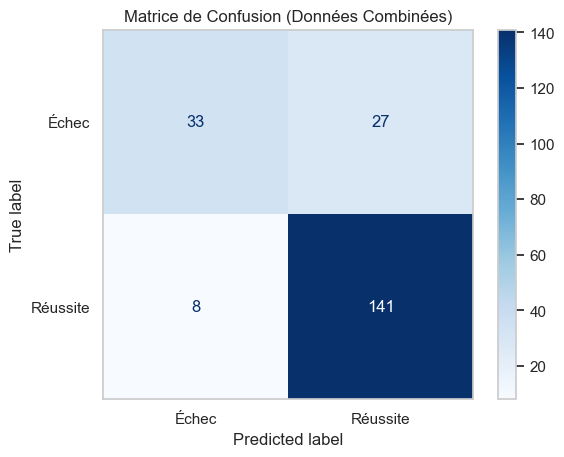

Calcul de la courbe d'apprentissage en cours...


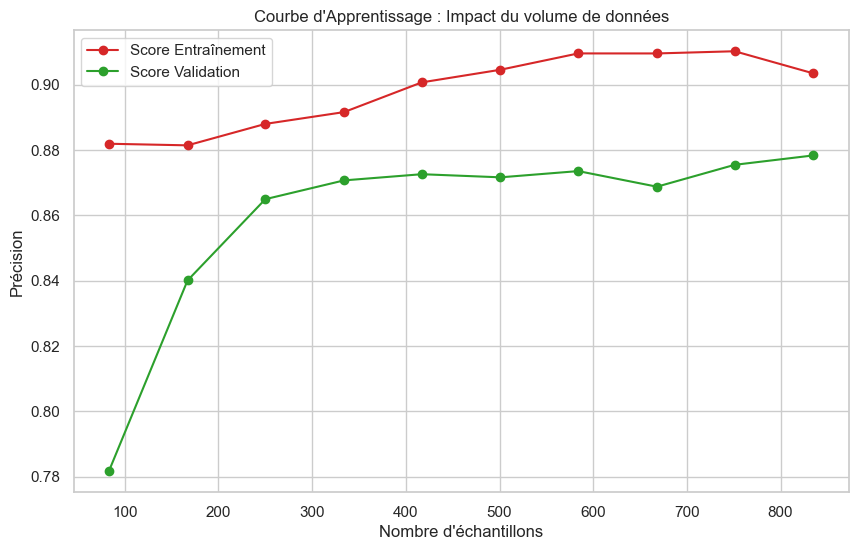

💾 Modèle final (Math+Por) sauvegardé sous 'tutor_model_combined.pkl'


In [5]:
# ==========================================
# 1. IMPORTATION DES LIBRAIRIES
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Configuration pour des graphiques professionnels
sns.set_theme(style="whitegrid")

# ==========================================
# 2. CHARGEMENT ET FUSION DES DONNÉES (MATH + PORTUGAIS)
# ==========================================
# Chargement des deux fichiers
try:
    df_mat = pd.read_csv('DataSet/student+performance/student/student-mat.csv', sep=';')
    df_por = pd.read_csv('DataSet/student+performance/student/student-por.csv', sep=';')

    # Ajout d'une colonne pour distinguer la matière (optionnel mais utile pour l'analyse)
    df_mat['subject'] = 'Math'
    df_por['subject'] = 'Portuguese'

    # FUSION : On combine les deux datasets l'un en dessous de l'autre
    df = pd.concat([df_mat, df_por], ignore_index=True)
    print(f"✅ Données chargées avec succès!")
    print(f"   - Mathématiques : {len(df_mat)} étudiants")
    print(f"   - Portugais : {len(df_por)} étudiants")
    print(f"   - TOTAL combiné : {len(df)} étudiants")

except FileNotFoundError:
    print("❌ ERREUR : Assurez-vous d'avoir téléversé 'student-mat.csv' ET 'student-por.csv' dans Colab.")

# ==========================================
# 3. PRÉPARATION DES DONNÉES (Target & Features)
# ==========================================
# Création de la cible (Target) : 1 si G3 >= 10, sinon 0
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Sélection des features (On ajoute 'subject' pour voir si la matière influe)
# Note : On doit encoder 'subject' plus tard ou le retirer si on veut un modèle générique
features = ['G1', 'studytime', 'failures', 'absences', 'schoolsup', 'famsup', 'activities', 'internet']
X = df[features]
y = df['pass']

# Encodage (One-Hot Encoding) pour les variables texte (yes/no)
X = pd.get_dummies(X, drop_first=True)

# Division des données (80% entrainement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# 4. ENTRAÎNEMENT DU MODÈLE OPTIMISÉ
# ==========================================
# On garde les réglages anti-overfitting (profondeur max 6)
model = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=4, random_state=42)
model.fit(X_train, y_train)

# ==========================================
# 5. ÉVALUATION ET VISUALISATIONS
# ==========================================
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n📊 Précision (Accuracy) sur le Dataset Combiné : {accuracy * 100:.2f}%")

# --- A. Matrice de Confusion ---
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Échec', 'Réussite']) # Fixed: Added display_labels
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matrice de Confusion (Données Combinées)")
plt.grid(False)
plt.show()

# --- B. Courbe d'Apprentissage ---
# Vérifions si plus de données (Math + Por) stabilise le modèle
print("Calcul de la courbe d'apprentissage en cours...")
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="#d62728", label="Score Entraînement")
plt.plot(train_sizes, test_mean, 'o-', color="#2ca02c", label="Score Validation")
plt.title("Courbe d'Apprentissage : Impact du volume de données")
plt.xlabel("Nombre d'échantillons")
plt.ylabel("Précision")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# --- C. Sauvegarde ---
joblib.dump(model, 'tutor_model_combined.pkl')
print("💾 Modèle final (Math+Por) sauvegardé sous 'tutor_model_combined.pkl'")

In [6]:
# Example: Student with 12/20 in first exam, 2 hours study, but 10 absences
# We must match the order of columns used in training
# [G1, studytime, failures, absences, schoolsup_yes, famsup_yes, activities_yes, internet_yes]

# Create a DataFrame for a new student, matching the training data's columns
# Assuming: G1=12, studytime=2, failures=0, absences=10
# For boolean features, we'll assume no school/family support or activities, but yes internet
new_student_data = pd.DataFrame([[12, 2, 0, 10, False, False, False, True]],
                                  columns=X_train.columns)

prediction = model.predict(new_student_data)
probability = model.predict_proba(new_student_data)

# Adjusting the print statements to correctly access probabilities
if prediction == 1:
    print(f"🔮 Prediction: PASS (Confidence: {probability[0][1]*100:.1f}%) Vincent)")
else:
    print(f"🔮 Prediction: AT RISK/FAIL (Confidence: {probability[0][0]*100:.1f}%) Vincent)")

🔮 Prediction: PASS (Confidence: 96.5%) Vincent)


<Figure size 800x600 with 0 Axes>

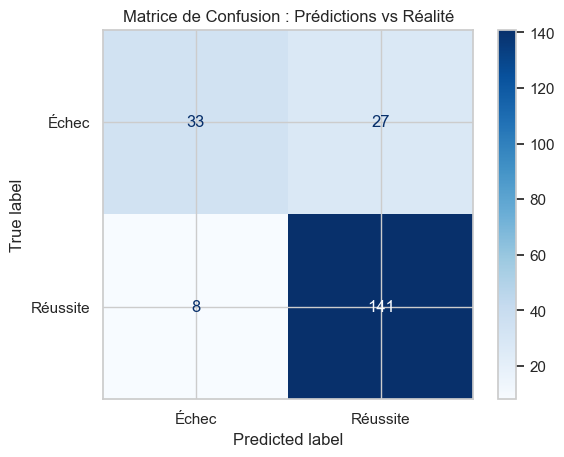

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# 2. Configurer l'affichage (0 = Échec, 1 = Réussite)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Échec', 'Réussite'])

# 3. Afficher le graphique
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues) # Utilise un dégradé bleu professionnel
plt.title("Matrice de Confusion : Prédictions vs Réalité")
plt.show()

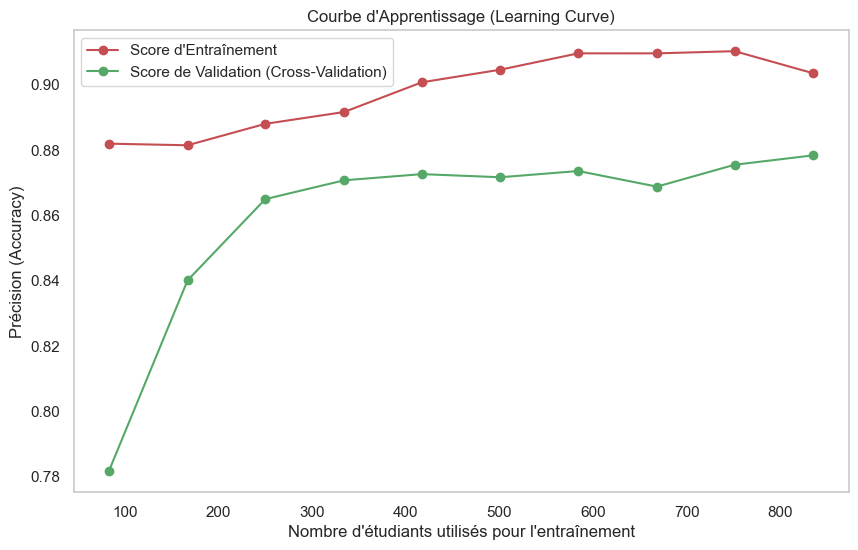

In [8]:
from sklearn.model_selection import learning_curve
import numpy as np

# 1. Calculer les performances sur des portions croissantes du dataset
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10) # Teste 10 tailles différentes
)

# 2. Calculer les moyennes pour lisser les courbes
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# 3. Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Score d'Entraînement")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Score de Validation (Cross-Validation)")

plt.title("Courbe d'Apprentissage (Learning Curve)")
plt.xlabel("Nombre d'étudiants utilisés pour l'entraînement")
plt.ylabel("Précision (Accuracy)")
plt.legend(loc="best")
plt.grid()
plt.show()